## Generate Data

In [73]:
from tnreason.model import markov_logic_network as mln

In [74]:
example_expression_dict = {
    "e0": ["Rechnung(x)", 1.5],
    "e1": [["not", "Ausgangsrechnung(x)"], 1.5],
    "e2": [["Ausgangsrechnung(x)", "and", "zuMandant(x,y)"], 2],
    "e3": [[["not", "Ausgangsrechnung(y)"], "and", ["not", "Rechnung(x)"]], 2],
    "e4": [["Ausgangsrechnung(x)", "and", "Rechnung(y)"], 2],
    "e5": ["Spezialrechnung(x)", 1.5],
    "e6": [["versandt(y,x)", "and", "Ausgangsrechnung(x)"], 2],
    "e7": [["bearbeitet(y,x)", "and", "enthaelt(x,z)"], 1.2]
}

In [75]:
generator = mln.TensorMLN(example_expression_dict)
sampleDf = generator.generate_sampleDf(sampleNum=100).astype("bool")
sampleDf.head()

100%|██████████| 9/9 [00:00<00:00, 999.81it/s]


,Rechnung(x),Ausgangsrechnung(x),"zuMandant(x,y)",Ausgangsrechnung(y),Rechnung(y),Spezialrechnung(x),"versandt(y,x)","bearbeitet(y,x)","enthaelt(x,z)"
0,True,True,True,False,True,True,True,True,True
1,True,True,True,False,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,False,True,True,True
4,False,True,True,False,True,True,True,True,True


## Learn an Expression

In [76]:
from tnreason.learning import expression_learning as el
from tnreason.logic import expression_calculus as ec

In [77]:
skeletonExpression = ["R1(y,x)", "and", "C1(x)"]  # ,"and","R2(x,z)"]
candidatesDict = {
    "C1(x)": ["Ausgangsrechnung(x)", "Rechnung(x)"],
    "C2(y)": ["Ausgangsrechnung(y)", "Rechnung(y)"],
    "R1(y,x)": ["versandt(y,x)", "bearbeitet(y,x)"],
    "R2(x,z)": ["enthaelt(x,z)"]
}

positiveCore = ec.evaluate_expression_on_sampleDf(sampleDf, ["Rechnung(y)","and","Ausgangsrechnung(x)"])
negativeCore = positiveCore.negate()

In [78]:
learner = el.AtomicLearner(skeletonExpression=skeletonExpression)
learner.generate_fixedCores_sampleDf(sampleDf, candidatesDict)
learner.random_initialize_variableCoresDict()
learner.generate_target_and_filterCore_from_exampleCores(positiveCore, negativeCore)
learner.als(10)
learner.get_solution()

## SWEEP 0 ##
Optimized leg R1(y,x): Residuum is 4.300479722870779
Optimized leg C1(x): Residuum is 3.1796028415146673
## SWEEP 1 ##
Optimized leg R1(y,x): Residuum is 3.1757705123018836
Optimized leg C1(x): Residuum is 3.1757542440646067
## SWEEP 2 ##
Optimized leg R1(y,x): Residuum is 3.1757541727436887
Optimized leg C1(x): Residuum is 3.1757541724302825
## SWEEP 3 ##
Optimized leg R1(y,x): Residuum is 3.1757541724289053
Optimized leg C1(x): Residuum is 3.1757541724288987
## SWEEP 4 ##
Optimized leg R1(y,x): Residuum is 3.1757541724288987
Optimized leg C1(x): Residuum is 3.1757541724288996
## SWEEP 5 ##
Optimized leg R1(y,x): Residuum is 3.1757541724288987
Optimized leg C1(x): Residuum is 3.1757541724288996
## SWEEP 6 ##
Optimized leg R1(y,x): Residuum is 3.1757541724288987
Optimized leg C1(x): Residuum is 3.1757541724288987
## SWEEP 7 ##
Optimized leg R1(y,x): Residuum is 3.1757541724288987
Optimized leg C1(x): Residuum is 3.1757541724288987
## SWEEP 8 ##
Optimized leg R1(y,x): Resi

In [79]:
print("The solution is {}.".format(learner.solutionExpression))

The solution is ['versandt(y,x)', 'and', 'Ausgangsrechnung(x)'].


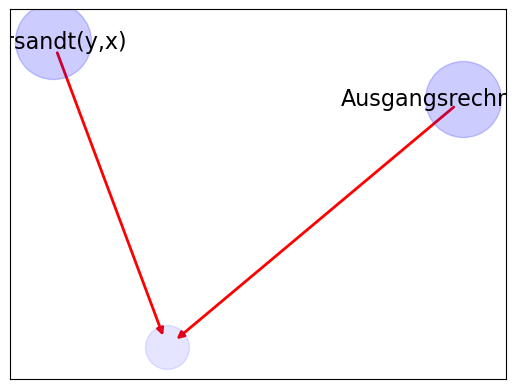

In [83]:
from tnreason.logic import expression_visualization as ev
ev.visualize_expression_graph(learner.solutionExpression)